In [ ]:
#ML exercise: Image classification with neural networks

In [22]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score



In [26]:
data_dir = '/Users/sarahlee/Downloads/STA380-master/data/EuroSAT_RGB'
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
dataset = datasets.ImageFolder(data_dir, transform=transform)
#80/20 train test split 
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [28]:
# Define the CNN model
class CNNClassifier(nn.Module):
    def __init__(self, num_classes):
        super(CNNClassifier, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 512)
        self.fc2 = nn.Linear(512, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)  # Flatten the output for the fully connected layer
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [30]:
num_classes = len(dataset.classes)
model = CNNClassifier(num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training
epochs = 10
for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}')
    

Epoch [1/10], Loss: 1.0768
Epoch [2/10], Loss: 0.6709
Epoch [3/10], Loss: 0.5173
Epoch [4/10], Loss: 0.4088
Epoch [5/10], Loss: 0.2992
Epoch [6/10], Loss: 0.2316
Epoch [7/10], Loss: 0.1974
Epoch [8/10], Loss: 0.1739
Epoch [9/10], Loss: 0.1491
Epoch [10/10], Loss: 0.1380


In [38]:
# Evaluate the model on the test set
model.eval()
y_true = []
y_pred = []
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Calculate and print the test accuracy
accuracy = np.mean(np.array(y_true) == np.array(y_pred))
print(f'Test Accuracy: {accuracy * 100:.2f}%')

Test Accuracy: 83.33%


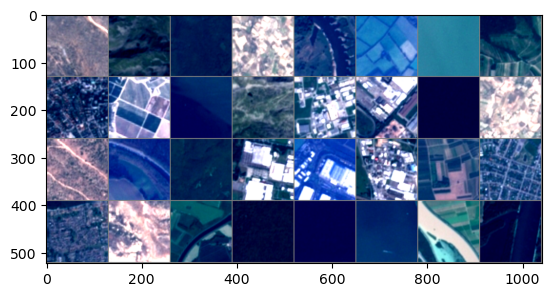

HerbaceousVegetation HerbaceousVegetation Forest PermanentCrop


In [60]:
# Visualize Example Images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    npimg = np.clip(npimg, 0, 1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{dataset.classes[labels[j]]}' for j in range(4)))


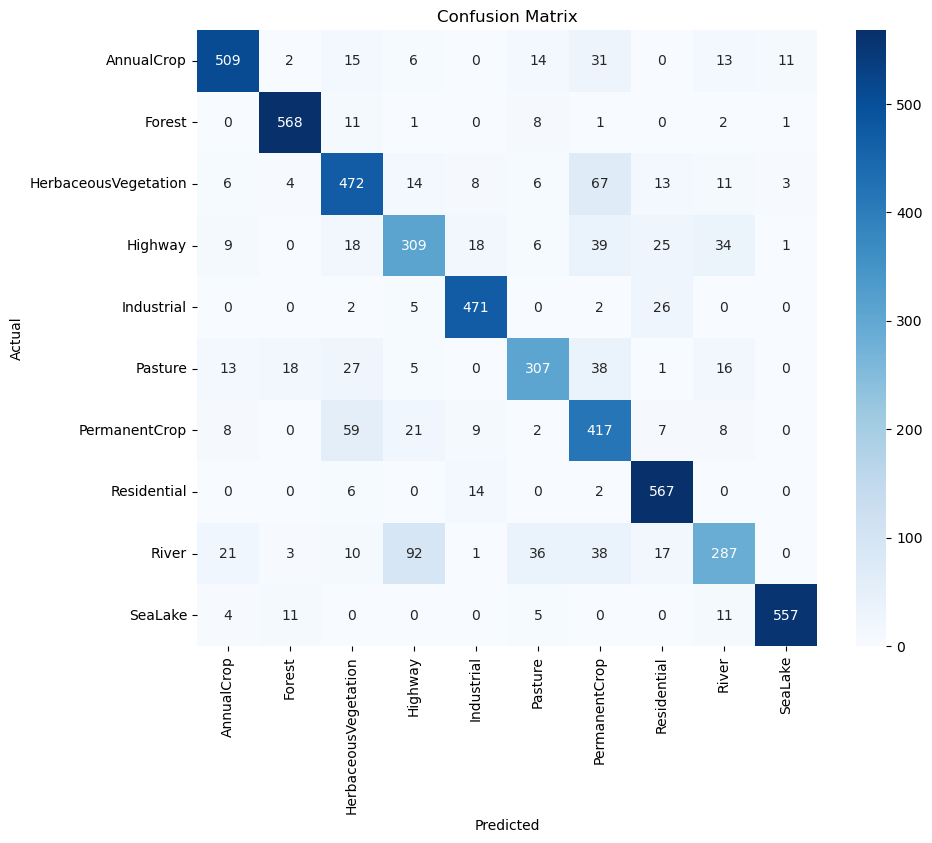

In [14]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=dataset.classes, yticklabels=dataset.classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


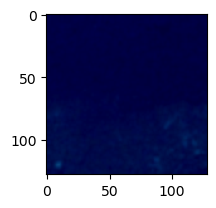

Image 1: Predicted = Forest, True = Forest


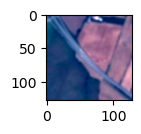

Image 2: Predicted = Highway, True = Highway


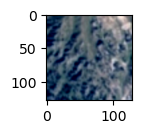

Image 3: Predicted = HerbaceousVegetation, True = HerbaceousVegetation


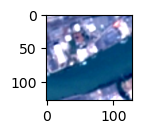

Image 4: Predicted = Industrial, True = River


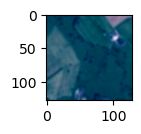

Image 5: Predicted = Pasture, True = Pasture


In [72]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize the image
    npimg = img.numpy()
    npimg = np.clip(npimg, 0, 1)
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Show 5 random test images with predictions
model.eval()

dataiter = iter(test_loader)
images, labels = next(dataiter)

outputs = model(images)
_, preds = torch.max(outputs, 1)

plt.figure(figsize=(12, 8))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    imshow(images[i])
    pred_label = dataset.classes[preds[i]]
    true_label = dataset.classes[labels[i]]
    ax.set_title(f'Pred: {pred_label}\nTrue: {true_label}')
    ax.axis('off')
    print(f'Image {i + 1}: Predicted = {pred_label}, True = {true_label}')
plt.show()